<a href="https://colab.research.google.com/github/Parkseojin2001/Machine-Learning_with_python/blob/main/Chapter2_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2
## ***지도 학습(Supervised Learning)*** 이란?
#### 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용하는 머신러닝 방법<br>
#### 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만듦.
***Goal***<br>
이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측
## 2.1 분류와 회귀
#### 지도 학습 종류 : 분류, 회귀
**분류(classification)** : 미리 정의된, 가능성 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것<br>

|분류 종류|설명|예시|
|------|---|---|
|이진 분류(binary classification)|질문의 답이 예/아니오만 나오는 경우|이메일에서 스팸을 분류하는 것|
|다중 분류(multiclass classification)|질문의 답이 3개 이상이 나오는 경우|붓꽃의 품종 분류|

**NOTE_이진 분류**
* 양성(positive) 클래스 : 학습하고자 하는 대상<br>
* 음성(nagative) 클래스 <-> 양성 클래스<br>

ex) 스팸 메일 분류<br>
* 스팸 메일 : 양성 클래스<br>
* 스팸이 아닌 메일 : 음성 클래스<br>

**회귀(regression)** : 부동소수점수(실수)를 예측하는 것<br>

ex) 
* 어떤 사람의 교육 수준, 나이 주거지를 통해 연간 소득을 예측하는 경우 
* 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등을 통한 올해 수확량을 예측하는 경우<br>


#### **회귀와 분류 문제를 구분하는 방법 : 출력 값의 연속성의 유무를 통해 구분**

## 2.2 일반화, 과대적합, 과소적합
**일반화** : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있는 경우<br>
**&rarr;** 훈련 세트에서 테스트 세트로 일반화되었다라고 말함<br>

**과대적합(overfitting)** : 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것<br>
**&rarr;** 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어남.<br>

**과소적합(underfitting)** : 너무 간단한 모델이 선택되는 것<br>
**&rarr;** 데이터의 면면과 다양성을 잡아내지 못하며 훈련 세트, 테스트 세트에 잘맞지 않음<br>

### ***Goal***
일반화 성능이 최대가 되는 최적점에 있는 모델<br>

<img src="https://tensorflowkorea.files.wordpress.com/2017/06/fig2-01.png?w=640">


### 2.2.1 모델 복잡도와 데이터셋 크기의 관계
#### 모델 복잡도 : 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음
데이터셋에 데이터 포인트가 많음 &rarr; 다양성&uarr;<br>

***But,*** 비슷한 데이터를 모으는 것은 도움X

**다양한 데이터 포인트&uarr; &rarr; 과대적합 없이 더 복잡한 모델을 만듦**<br>

## 2.3 지도 학습 알고리즘

*   데이터를 이용한 학습 & 예측
*   모델의 복잡도의 역할 & 알고리즘을 통한 모델 생성
* 모델들의 장단점 평가
* 매개변수와 옵션의 의미 설명


In [ ]:
!pip install mglearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

### 2.3.1 예제에 사용할 데이터셋
forge 데이터셋 : 두 개의 특성을 가진 데이터셋(이진 분류 데이터셋)<br>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


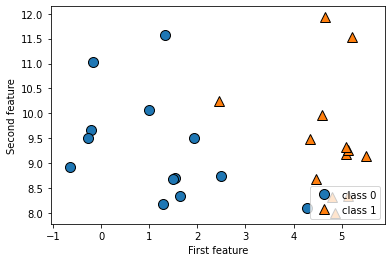

In [ ]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 1], X[:, 0], y)
plt.legend(["class 0", "class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

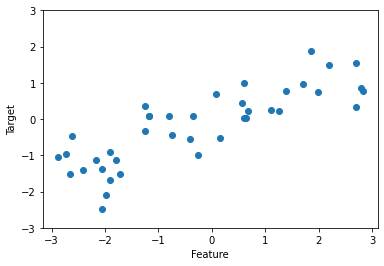

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

**저차원 데이터셋** : 특성이 적은 데이터셋<br>
**고차원 데이터셋** : 특성이 많은 데이터셋<br>

저차원 데이터셋 &rarr; 고차원 데이터셋 : 직관이 유지되지 않을 수 있음.

#### ***저차원 데이터셋을 사용하는 것이 좋음***


In [ ]:
# 유방암 종양의 임상 데이터 불러오기(classification)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# 데이터 포인트:569개 / 특성:30개
print("Cancer data shape:",cancer.data.shape)

Cancer data shape: (569, 30)


In [ ]:
# 악성:212개 / 양성: 357개
print("Class sample count:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Class sample count:
 {'malignant': 212, 'benign': 357}


In [ ]:
print("Feature name:\n", cancer.feature_names)

Feature name:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# 보스턴 주택가격 데이터셋(regression)
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

***특성 공학(feature engineering)*** 이란?<br>
  
개별 특성을 곱해 새로운 특성을 만드는 것

In [ ]:
# 13개 특성 중 2개씩 짝지어 만든 91(=13*12/2)개 특성 + 13개 특성
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃